##### Model comparison for DDM fits


Produces model comparison analyses associated w/ Figure 6.

Normative evidence weighting and accumulation in correlated environments. Tardiff et al. (2024).

Nathan Tardiff 05/28/24

In [1]:
imatlab_export_fig('print-svg')
set(0,'defaultfigurecolor',[1 1 1])
set(groot,'DefaultAxesFontName','Arial')

In [2]:
fit_dir = './data/fits';
fit_dir0 = fullfile(fit_dir,'base0'); %fit directory for the zero corr fits to establish need for collapsing bound

## base fits, zero corr
Establish which base model (i.e., that doesn't deal w/ correlations or correlated data) is best.

In [3]:
fit_data_base = 'base_fits_all_o00_2023-05-30b.csv';

fits_base = readtable(fullfile(fit_dir0,fit_data_base))


fits_base =

  200x7 table

              subject                 model       nparams     nlle      bic       aic      rho_cond
    ____________________________    __________    _______    ______    ______    ______    ________

    {'613a8ef513f5e9934f6f6fb3'}    {'base'  }       4       276.68    575.54    561.36      0.2   
    {'613a8ef513f5e9934f6f6fb3'}    {'baseCL'}       5        272.4    572.52     554.8      0.2   
    {'613433e6d6d82dbdad53e847'}    {'base'  }       4       431.89    885.96    871.78      0.2   
    {'613433e6d6d82dbdad53e847'}    {'baseCL'}       5       412.87    853.47    835.75      0.2   
    {'6028191ed22ee868e11c5095'}    {'base'  }       4       457.52    937.22    923.04      0.4   
    {'6028191ed22ee868e11c5095'}    {'baseCL'}       5       457.51    942.75    925.03      0.4   
    {'5f4d23b56bf20b9817acf539'}    {'base'  }       4        357.1     736.2     722.2      0.8   
    {'5f4d23b56bf20b9817acf539'}    {'baseCL'}       5       357.22   

    {'615b4d67bd21e66571f5581b'}    {'baseCL'}       5       509.31    1046.3    1028.6      0.6   
    {'5f2de3a7b874e712ac7bc516'}    {'base'  }       4       539.64    1101.5    1087.3      0.2   
    {'5f2de3a7b874e712ac7bc516'}    {'baseCL'}       5       535.85    1099.4    1081.7      0.2   
    {'5ef37588bfe86a0ca12ba515'}    {'base'  }       4       406.11    834.41    820.23      0.2   
    {'5ef37588bfe86a0ca12ba515'}    {'baseCL'}       5       402.37    832.46    814.74      0.2   
    {'5e705a1be6c65a62c56a3143'}    {'base'  }       4        515.3    1052.8    1038.6      0.2   
    {'5e705a1be6c65a62c56a3143'}    {'baseCL'}       5        506.2    1040.1    1022.4      0.2   
    {'5f3ee36d0306de1a411882a5'}    {'base'  }       4       489.66    1001.5    987.32      0.2   
    {'5f3ee36d0306de1a411882a5'}    {'baseCL'}       5       488.35    1004.4     986.7      0.2   
    {'5e902a581baf783237598a3c'}    {'base'  }       4       570.13    1162.4    1148.3      0.4   


    {'60f8ad596f73b24de783aab7'}    {'base'  }       4       456.04    934.22    920.07      0.8   
    {'60f8ad596f73b24de783aab7'}    {'baseCL'}       5          455    937.69       920      0.8   
    {'613f8d6600a918d57f57908b'}    {'base'  }       4        526.4      1075    1060.8      0.6   
    {'613f8d6600a918d57f57908b'}    {'baseCL'}       5       517.18    1062.1    1044.4      0.6   
    {'5bf9881e1eafa5000110c99a'}    {'base'  }       4       330.81     683.8    669.62      0.4   
    {'5bf9881e1eafa5000110c99a'}    {'baseCL'}       5       320.79    669.31    651.59      0.4   
    {'5d585e287d795e001788bf4c'}    {'base'  }       4       579.08    1180.3    1166.2      0.4   
    {'5d585e287d795e001788bf4c'}    {'baseCL'}       5       576.46    1180.6    1162.9      0.4   
    {'5ffb977f4c2f340a07f2432e'}    {'base'  }       4       402.87     827.9    813.74      0.8   
    {'5ffb977f4c2f340a07f2432e'}    {'baseCL'}       5       401.62    830.94    813.23      0.8   


In [4]:
fits_base_ave = summary_stats(fits_base,{'nlle','aic'},'model')

delta_baseCL_base = fits_base_ave.mean_aic(strcmp(fits_base_ave.model,'baseCL')) - ...
    fits_base_ave.mean_aic(strcmp(fits_base_ave.model,'base'))


fits_base_ave =

  2x8 table

      model       GroupCount    mean_nlle    mean_aic    std_nlle    std_aic    sem_nlle    sem_aic
    __________    __________    _________    ________    ________    _______    ________    _______

    {'base'  }       100         467.41       942.81      104.37     208.74      10.437     20.874 
    {'baseCL'}       100         462.17       934.35      104.92     209.85      10.492     20.985 


delta_baseCL_base =

   -8.4655



In [5]:
%any difference by corr cond?
fits_base_ave_rho = summary_stats(fits_base,{'nlle','aic'},{'rho_cond','model'});
fits_base_ave_rho(:,{'rho_cond','model','mean_nlle','mean_aic'})


ans =

  8x4 table

    rho_cond      model       mean_nlle    mean_aic
    ________    __________    _________    ________

      0.2       {'base'  }     462.83       933.67 
      0.2       {'baseCL'}     456.48       922.96 
      0.4       {'base'  }     453.48       914.96 
      0.4       {'baseCL'}     447.79       905.59 
      0.6       {'base'  }     478.05       964.11 
      0.6       {'baseCL'}      473.4       956.79 
      0.8       {'base'  }     475.26       958.51 
      0.8       {'baseCL'}     471.02       952.05 



---
Date: 28-May-2024 15:03:28
VB converged in 37 iterations (took ~9 sec).
Dimensions:
     - subjects: n=100
     - models: K=2
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

posterior_base = 

  struct with fields:

    a: [2x1 double]
    r: [2x100 double]


out_base = 

  struct with fields:

         dt: 9.8473
    options: [1x1 struct]
          L: [2x100 double]
          F: [-4.6998e+04 -4.6727e+04 -4.6723e+04 -4.6721e+04 ... ]
         Ef: [2x1 double]
         Vf: [2x1 double]
         ep: [0 1]
        ELJ: -4.6737e+04
        Sqf: -2.2830
        Sqm: 19.5130
         F0: -4.6730e+04
        bor: 1.8406e-05
       Fffx: -4.6718e+04
        pxp: [9.2030e-06 1.0000]
       date: [2024 5 28 15 3 28.1618]
        PEP: [9.2030e-06 1.0000]



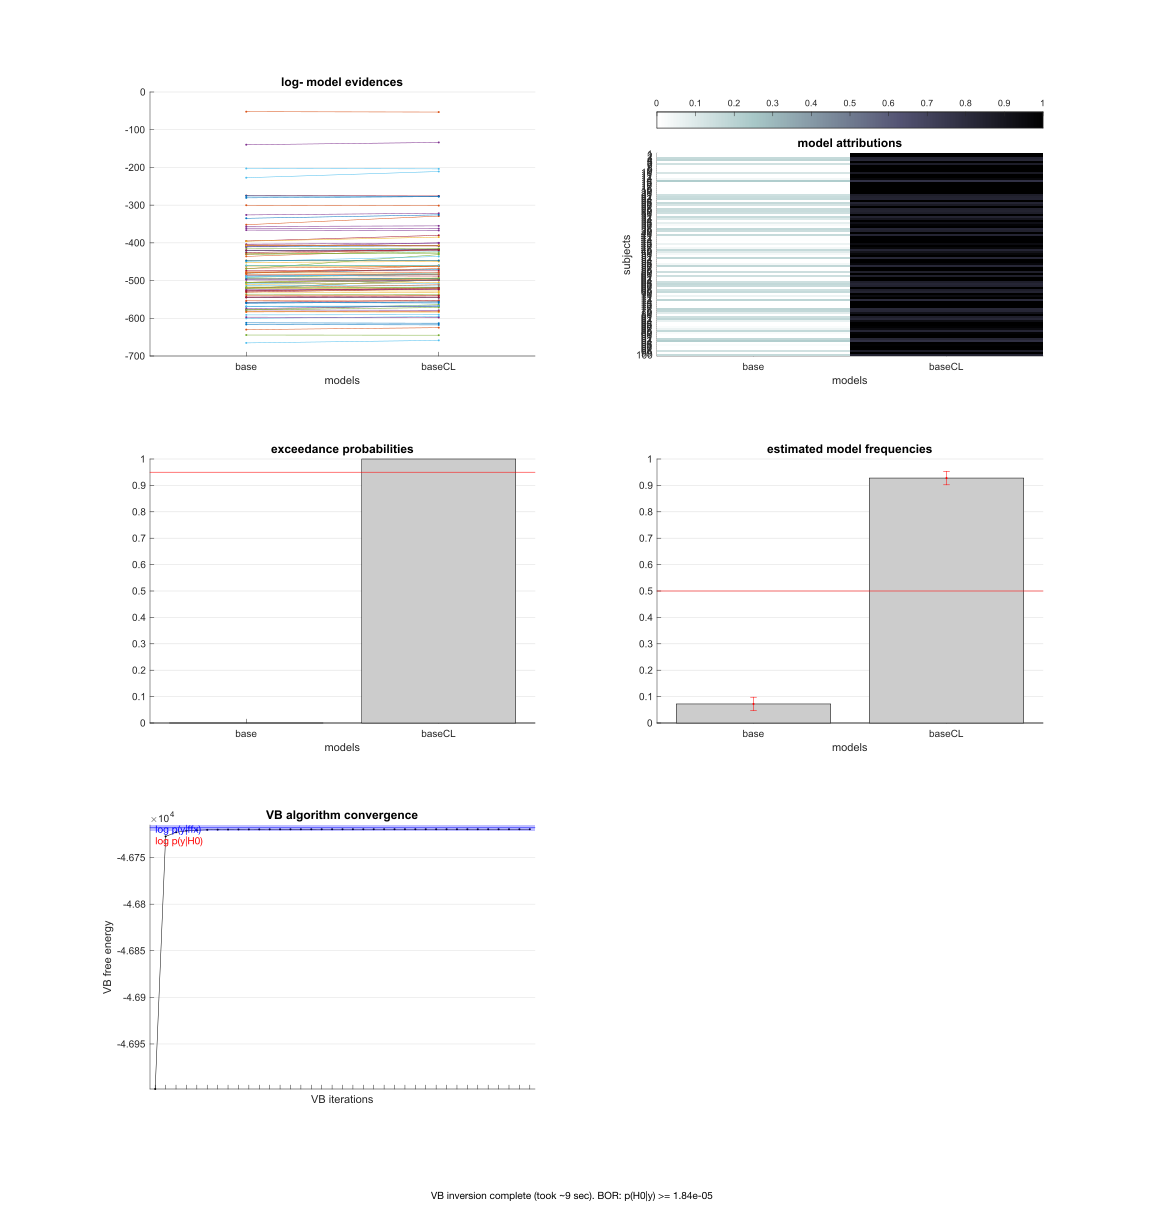

In [6]:
[posterior_base,out_base] = do_BMC(fits_base)

## shared fits to all data

Right now comparing model with all shared params (rsharedCLT), model with correlation-dependent bound (bound_rscaleCLT_sk), and model w/ correlation-dependent bound and drift (bound_rscaleCLT_vk), and model w/ only correlation-dependent drift (bound_sharedCLT_vk). All have a linear collapsing bound.

In [7]:
fit_data_shared = 'shared_fits_all_2023-06-26.csv';

fits_shared = readtable(fullfile(fit_dir,fit_data_shared))


fits_shared =

  400x7 table

              subject                       model             nparams     nlle      bic       aic      rho_cond
    ____________________________    ______________________    _______    ______    ______    ______    ________

    {'5f30ee4c383a0d56521f69c7'}    {'rsharedCLT'        }       5       1467.9      2969    2945.9      0.2   
    {'5f30ee4c383a0d56521f69c7'}    {'bound_rscaleCLT_sk'}       7       1463.5    2973.4      2941      0.2   
    {'5f30ee4c383a0d56521f69c7'}    {'bound_sharedCLT_vk'}       7       1467.2    2980.8    2948.4      0.2   
    {'5f30ee4c383a0d56521f69c7'}    {'bound_rscaleCLT_vk'}       9       1463.9    2987.4    2945.8      0.2   
    {'613a8ef513f5e9934f6f6fb3'}    {'rsharedCLT'        }       5       865.41      1764    1740.8      0.2   
    {'613a8ef513f5e9934f6f6fb3'}    {'bound_rscaleCLT_sk'}       7       862.26      1771    1738.5      0.2   
    {'613a8ef513f5e9934f6f6fb3'}    {'bound_sharedCLT_vk'}       7      

    {'61526e562a87079dc683ae46'}    {'bound_rscaleCLT_vk'}       9       823.28    1705.2    1664.6      0.2   
    {'5f7226dd35ca1810df602df9'}    {'rsharedCLT'        }       5       1546.6    3126.4    3103.1      0.2   
    {'5f7226dd35ca1810df602df9'}    {'bound_rscaleCLT_sk'}       7       1541.1    3128.8    3096.3      0.2   
    {'5f7226dd35ca1810df602df9'}    {'bound_sharedCLT_vk'}       7       1545.1    3136.7    3104.2      0.2   
    {'5f7226dd35ca1810df602df9'}    {'bound_rscaleCLT_vk'}       9       1542.7    3145.3    3103.5      0.2   
    {'613a6f333eacb2c4641d0540'}    {'rsharedCLT'        }       5       1654.4      3342    3318.9      0.2   
    {'613a6f333eacb2c4641d0540'}    {'bound_rscaleCLT_sk'}       7       1647.3    3341.1    3308.7      0.2   
    {'613a6f333eacb2c4641d0540'}    {'bound_sharedCLT_vk'}       7       1654.1    3354.7    3322.2      0.2   
    {'613a6f333eacb2c4641d0540'}    {'bound_rscaleCLT_vk'}       9       1645.2    3350.1    3308.4     

    {'5e1842435b1c591274aef230'}    {'bound_sharedCLT_vk'}       7       702.25    1450.9    1418.5      0.4   
    {'5e1842435b1c591274aef230'}    {'bound_rscaleCLT_vk'}       9       672.27    1404.2    1362.5      0.4   
    {'60f746b5a1d6bb66dce1de1a'}    {'rsharedCLT'        }       5       1510.5    3054.3    3031.1      0.4   
    {'60f746b5a1d6bb66dce1de1a'}    {'bound_rscaleCLT_sk'}       7         1481    3008.6    2976.1      0.4   
    {'60f746b5a1d6bb66dce1de1a'}    {'bound_sharedCLT_vk'}       7       1501.9    3050.3    3017.8      0.4   
    {'60f746b5a1d6bb66dce1de1a'}    {'bound_rscaleCLT_vk'}       9       1483.3    3026.4    2984.7      0.4   
    {'5f0c002c47848351fd023d3d'}    {'rsharedCLT'        }       5       1878.1    3789.1    3766.2      0.4   
    {'5f0c002c47848351fd023d3d'}    {'bound_rscaleCLT_sk'}       7       1838.2    3722.4    3690.4      0.4   
    {'5f0c002c47848351fd023d3d'}    {'bound_sharedCLT_vk'}       7         1874    3794.1    3762.1     

    {'60559f56d83f5feda6faecb0'}    {'bound_rscaleCLT_sk'}       7       1391.8    2830.1    2797.6      0.6   
    {'60559f56d83f5feda6faecb0'}    {'bound_sharedCLT_vk'}       7       1475.4    2997.3    2964.8      0.6   
    {'60559f56d83f5feda6faecb0'}    {'bound_rscaleCLT_vk'}       9       1390.7    2841.2    2799.4      0.6   
    {'60fa57e98690c7b772fbf797'}    {'rsharedCLT'        }       5         1865    3763.2      3740      0.6   
    {'60fa57e98690c7b772fbf797'}    {'bound_rscaleCLT_sk'}       7       1731.8    3510.1    3477.6      0.6   
    {'60fa57e98690c7b772fbf797'}    {'bound_sharedCLT_vk'}       7       1855.1    3756.6    3724.1      0.6   
    {'60fa57e98690c7b772fbf797'}    {'bound_rscaleCLT_vk'}       9       1731.2    3522.2    3480.4      0.6   
    {'615b4d67bd21e66571f5581b'}    {'rsharedCLT'        }       5         1628    3289.1    3265.9      0.6   
    {'615b4d67bd21e66571f5581b'}    {'bound_rscaleCLT_sk'}       7       1548.6    3143.7    3111.2     

    {'613f8d6600a918d57f57908b'}    {'bound_rscaleCLT_vk'}       9       1576.8    3213.3    3171.5      0.6   
    {'6176846e673909995a32dce3'}    {'rsharedCLT'        }       5       792.82    1618.9    1595.6      0.6   
    {'6176846e673909995a32dce3'}    {'bound_rscaleCLT_sk'}       7       680.62    1407.8    1375.2      0.6   
    {'6176846e673909995a32dce3'}    {'bound_sharedCLT_vk'}       7       791.36    1629.2    1596.7      0.6   
    {'6176846e673909995a32dce3'}    {'bound_rscaleCLT_vk'}       9        679.7    1419.2    1377.4      0.6   
    {'5b477fdb56e0140001ac7720'}    {'rsharedCLT'        }       5       1389.2    2811.6    2788.4      0.8   
    {'5b477fdb56e0140001ac7720'}    {'bound_rscaleCLT_sk'}       7       1189.6    2425.7    2393.2      0.8   
    {'5b477fdb56e0140001ac7720'}    {'bound_sharedCLT_vk'}       7       1386.5    2819.6    2787.1      0.8   
    {'5b477fdb56e0140001ac7720'}    {'bound_rscaleCLT_vk'}       9       1183.9    2427.6    2385.8     

    {'5f4d23b56bf20b9817acf539'}    {'bound_rscaleCLT_sk'}       7       1156.3    2358.7    2326.5      0.8   
    {'5f4d23b56bf20b9817acf539'}    {'bound_sharedCLT_vk'}       7       1356.1    2758.3    2726.1      0.8   
    {'5f4d23b56bf20b9817acf539'}    {'bound_rscaleCLT_vk'}       9       1155.2    2369.7    2328.3      0.8   
    {'5f45613cde4a9714259f31fc'}    {'rsharedCLT'        }       5       1708.6    3450.4    3427.2      0.8   
    {'5f45613cde4a9714259f31fc'}    {'bound_rscaleCLT_sk'}       7       1492.1    3030.6    2998.1      0.8   
    {'5f45613cde4a9714259f31fc'}    {'bound_sharedCLT_vk'}       7       1687.6    3421.6    3389.1      0.8   
    {'5f45613cde4a9714259f31fc'}    {'bound_rscaleCLT_vk'}       9       1491.7    3043.2    3001.5      0.8   
    {'613ab15693299c16c27d8c92'}    {'rsharedCLT'        }       5       1843.8    3720.8    3697.6      0.8   
    {'613ab15693299c16c27d8c92'}    {'bound_rscaleCLT_sk'}       7       1693.8      3434    3401.5     

In [8]:
fits_shared_ave = summary_stats(fits_shared,{'nlle','aic'},'model')


fits_shared_ave =

  4x8 table

            model             GroupCount    mean_nlle    mean_aic    std_nlle    std_aic    sem_nlle    sem_aic
    ______________________    __________    _________    ________    ________    _______    ________    _______

    {'bound_rscaleCLT_sk'}       100         1415.7       2845.4      312.19     624.37      31.219     62.437 
    {'bound_rscaleCLT_vk'}       100         1413.7       2845.4       311.9      623.8       31.19      62.38 
    {'bound_sharedCLT_vk'}       100         1482.5         2979      321.19     642.37      32.119     64.237 
    {'rsharedCLT'        }       100         1488.8       2987.6      323.76     647.52      32.376     64.752 



In [9]:
%any difference by corr cond?

fits_shared_ave_rho = summary_stats(fits_shared,{'nlle','aic'},{'rho_cond','model'});
fits_shared_ave_rho(:,{'rho_cond','model','mean_nlle','mean_aic'})


ans =

  16x4 table

    rho_cond            model             mean_nlle    mean_aic
    ________    ______________________    _________    ________

      0.2       {'bound_rscaleCLT_sk'}     1371.4       2756.8 
      0.2       {'bound_rscaleCLT_vk'}     1371.2       2760.4 
      0.2       {'bound_sharedCLT_vk'}     1376.4       2766.9 
      0.2       {'rsharedCLT'        }     1376.8       2763.6 
      0.4       {'bound_rscaleCLT_sk'}       1358       2729.9 
      0.4       {'bound_rscaleCLT_vk'}     1358.4       2734.8 
      0.4       {'bound_sharedCLT_vk'}     1382.5       2779.1 
      0.4       {'rsharedCLT'        }     1385.7       2781.4 
      0.6       {'bound_rscaleCLT_sk'}     1454.7       2923.3 
      0.6       {'bound_rscaleCLT_vk'}     1452.2       2922.4 
      0.6       {'bound_sharedCLT_vk'}     1534.8       3083.6 
      0.6       {'rsharedCLT'        }     1540.6       3091.2 
      0.8       {'bound_rscaleCLT_sk'}     1478.7       2971.4 
      0.8       {

### Compute PEPs

---
Date: 28-May-2024 15:03:33
VB converged in 9 iterations (took ~2 sec).
Dimensions:
     - subjects: n=100
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

posterior_shared = 

  struct with fields:

    a: [4x1 double]
    r: [4x100 double]


out_shared = 

  struct with fields:

         dt: 2.2971
    options: [1x1 struct]
          L: [4x100 double]
          F: [-1.4594e+05 -1.4219e+05 -1.4218e+05 -1.4218e+05 ... ]
         Ef: [4x1 double]
         Vf: [4x1 double]
         ep: [0.9999 1.1000e-04 0 0]
        ELJ: -1.4220e+05
        Sqf: -14.0445
        Sqm: 28.6623
         F0: -1.4224e+05
        bor: 2.2340e-25
       Fffx: -1.4227e+05
        pxp: [0.9999 1.4000e-04 5.5851e-26 5.5851e-26]
       date: [2024 5 28 15 3 33.8104]
        PEP: [0.9999 1.1000e-04 5.5851e-26 5.5851e-26]



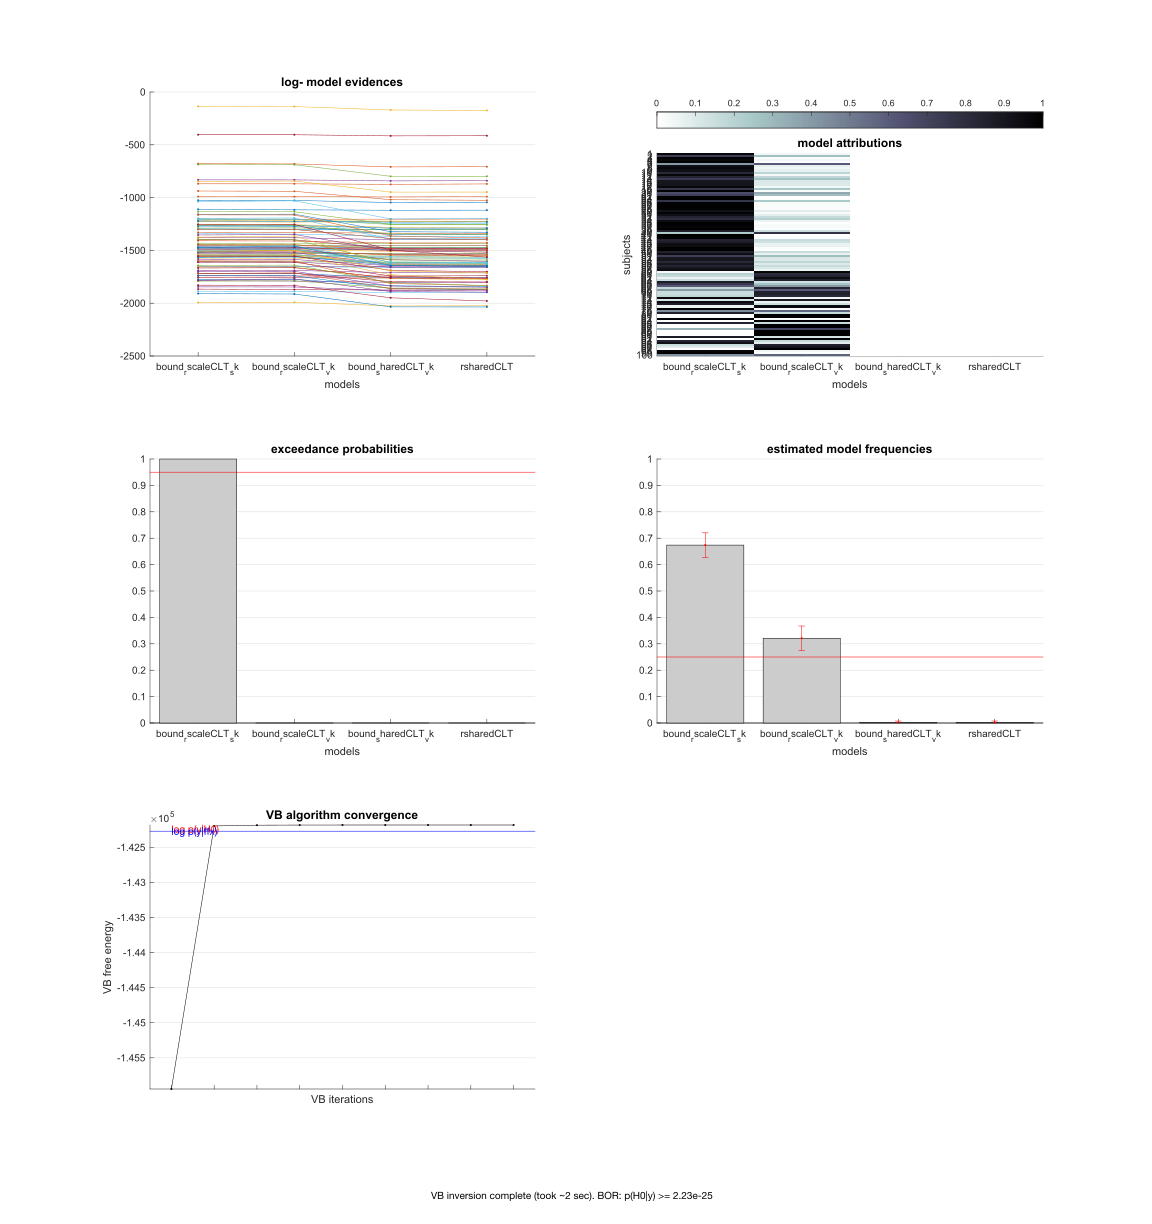

In [10]:
[posterior_shared,out_shared] = do_BMC(fits_shared)

outT_shared = table(out_shared.options.modelNames',out_shared.Ef,out_shared.ep',out_shared.PEP',...
'VariableNames',{'model','EF','EP','PEP'});


ans =

  4x4 table

            model             mean_aic       PEP           EF    
    ______________________    ________    __________    _________

    {'bound_rscaleCLT_sk'}     2845.4        0.99989      0.67387
    {'bound_rscaleCLT_vk'}     2845.4        0.00011      0.32111
    {'bound_sharedCLT_vk'}       2979     5.5851e-26    0.0024878
    {'rsharedCLT'        }     2987.6     5.5851e-26    0.0025368



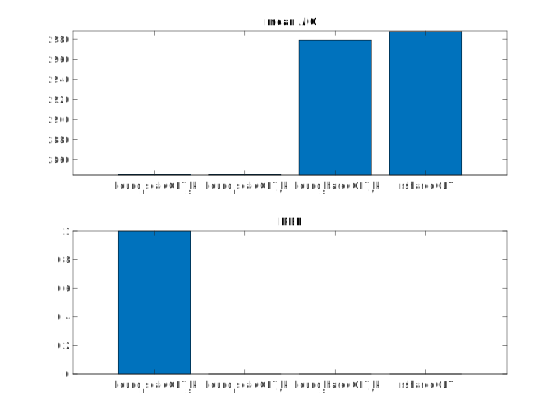

In [11]:
fits_shared_aveP = innerjoin(fits_shared_ave,outT_shared,'Keys','model');
fits_shared_aveP(:,{'model','mean_aic','PEP','EF'})

figure();
subplot(2,1,1)
bar(categorical(fits_shared_aveP.model),fits_shared_aveP.mean_aic)
title('mean AIC')
ylim([min(fits_shared_aveP.mean_aic)-0.5 max(fits_shared_aveP.mean_aic)+0.5])
subplot(2,1,2)
bar(categorical(fits_shared_aveP.model),fits_shared_aveP.PEP)
title('PEP')

    0.2000

---
Date: 28-May-2024 15:03:40
VB converged in 18 iterations (took ~3 sec).
Dimensions:
     - subjects: n=25
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000
    0.4000

---
Date: 28-May-2024 15:03:42
VB converged in 9 iterations (took ~2 sec).
Dimensions:
     - subjects: n=25
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000
    0.6000

---
Date: 28-May-2024 15:03:44
VB converged in 9 iterations (took ~1 sec).
Dimensions:
     - subjects: n=25
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000
    0.8000

---
Date: 28-May-2024 15:03:46
VB converged in 8 iterations (took ~1 sec).
Dimensions:
     - subjects: n=25
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

outT_shared_rho =

  16x5 table

            model                EF          EP          PEP        rho_cond
    ____

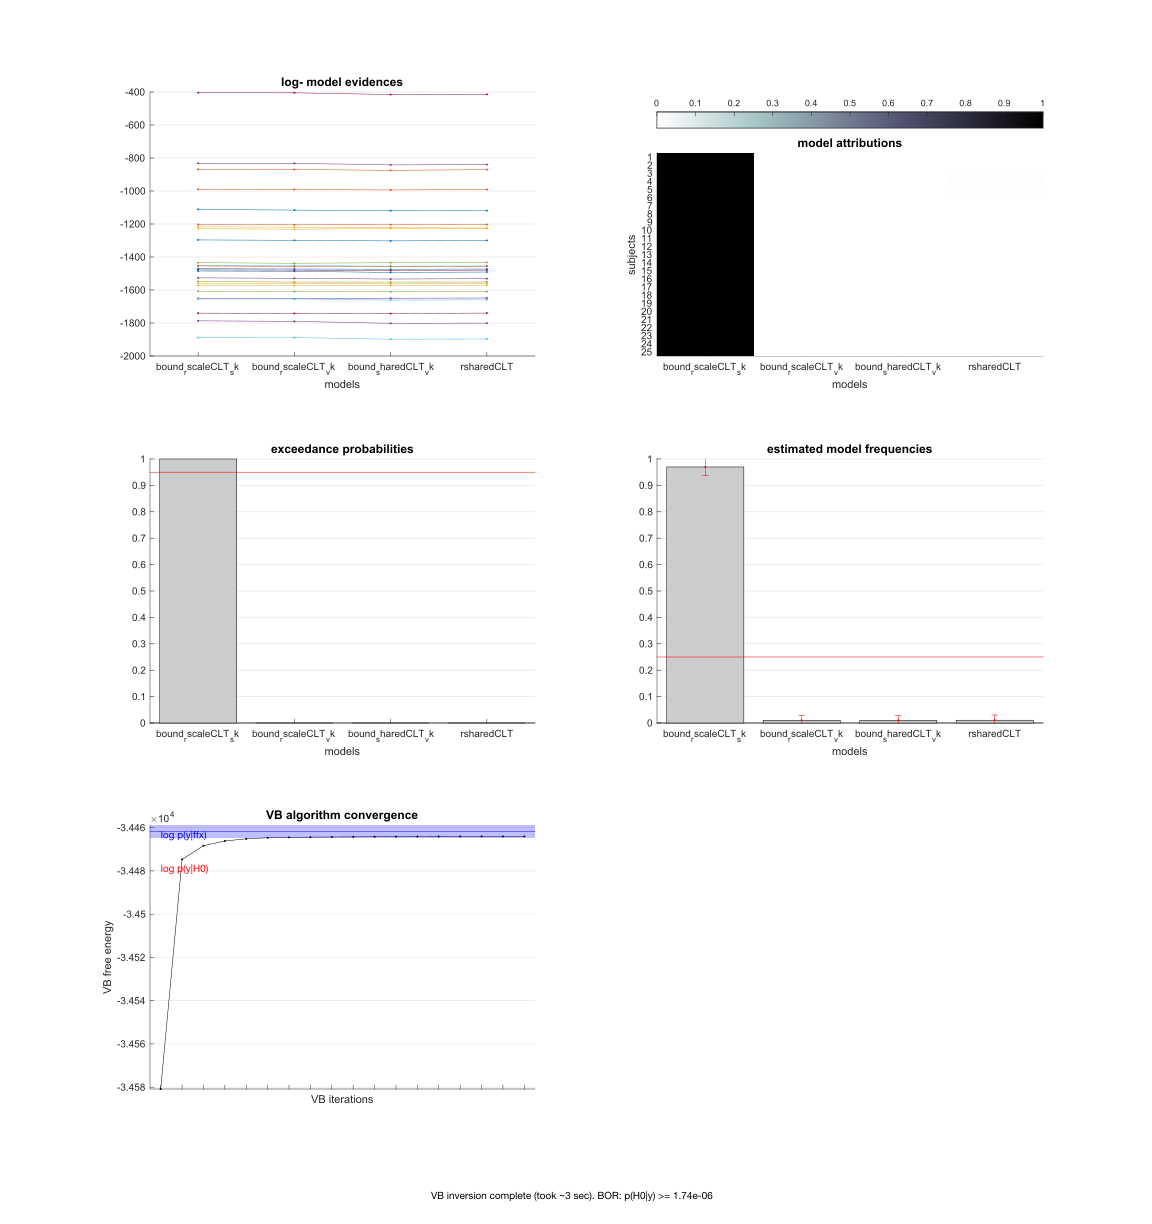

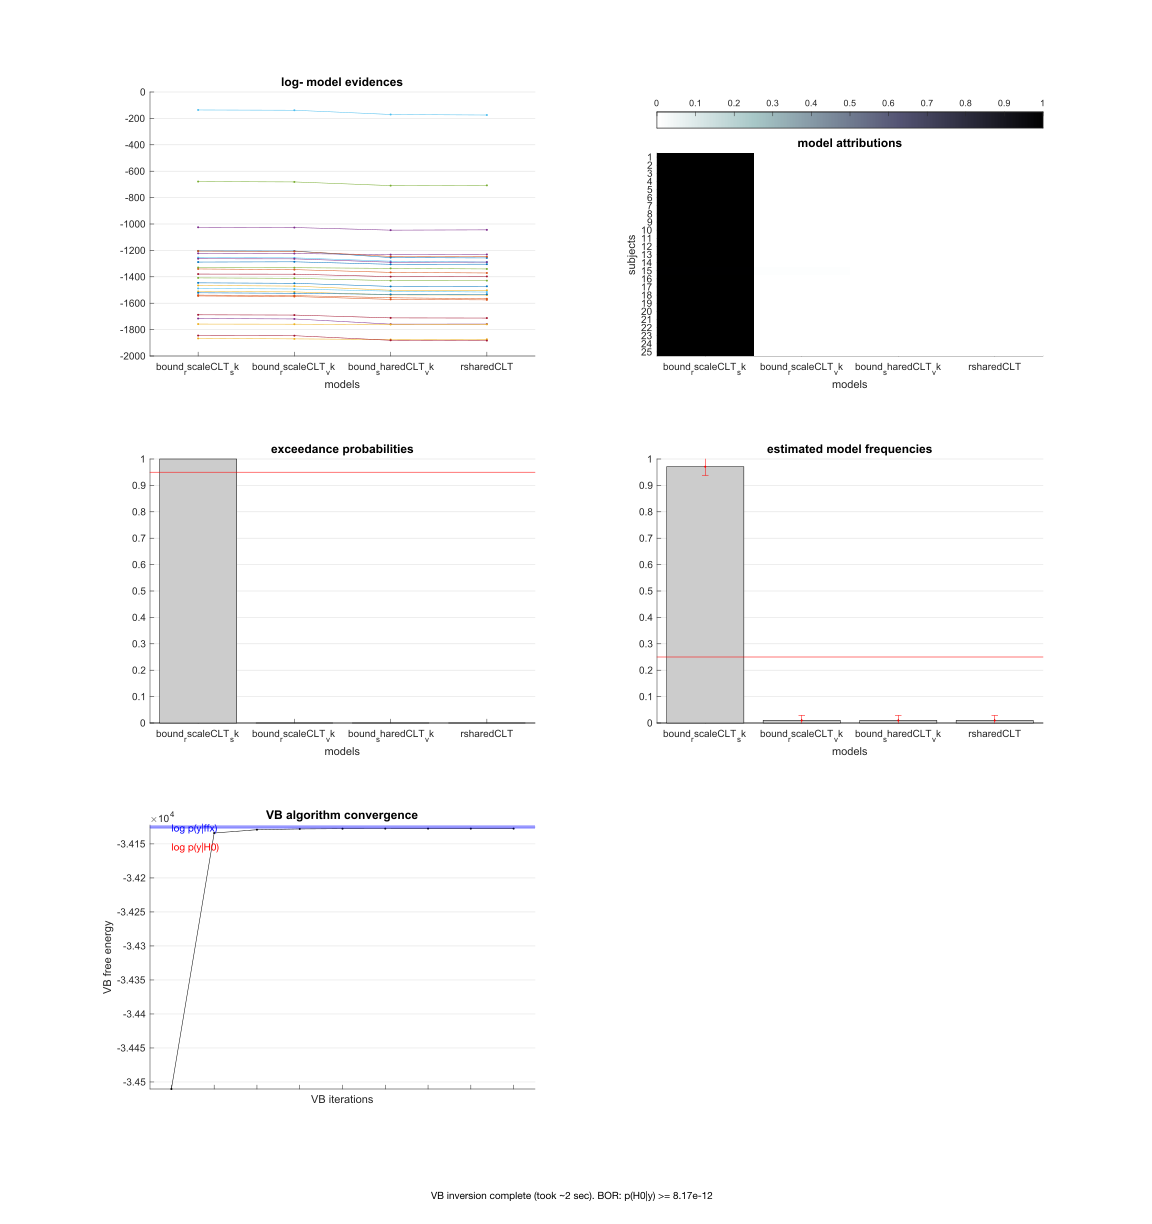

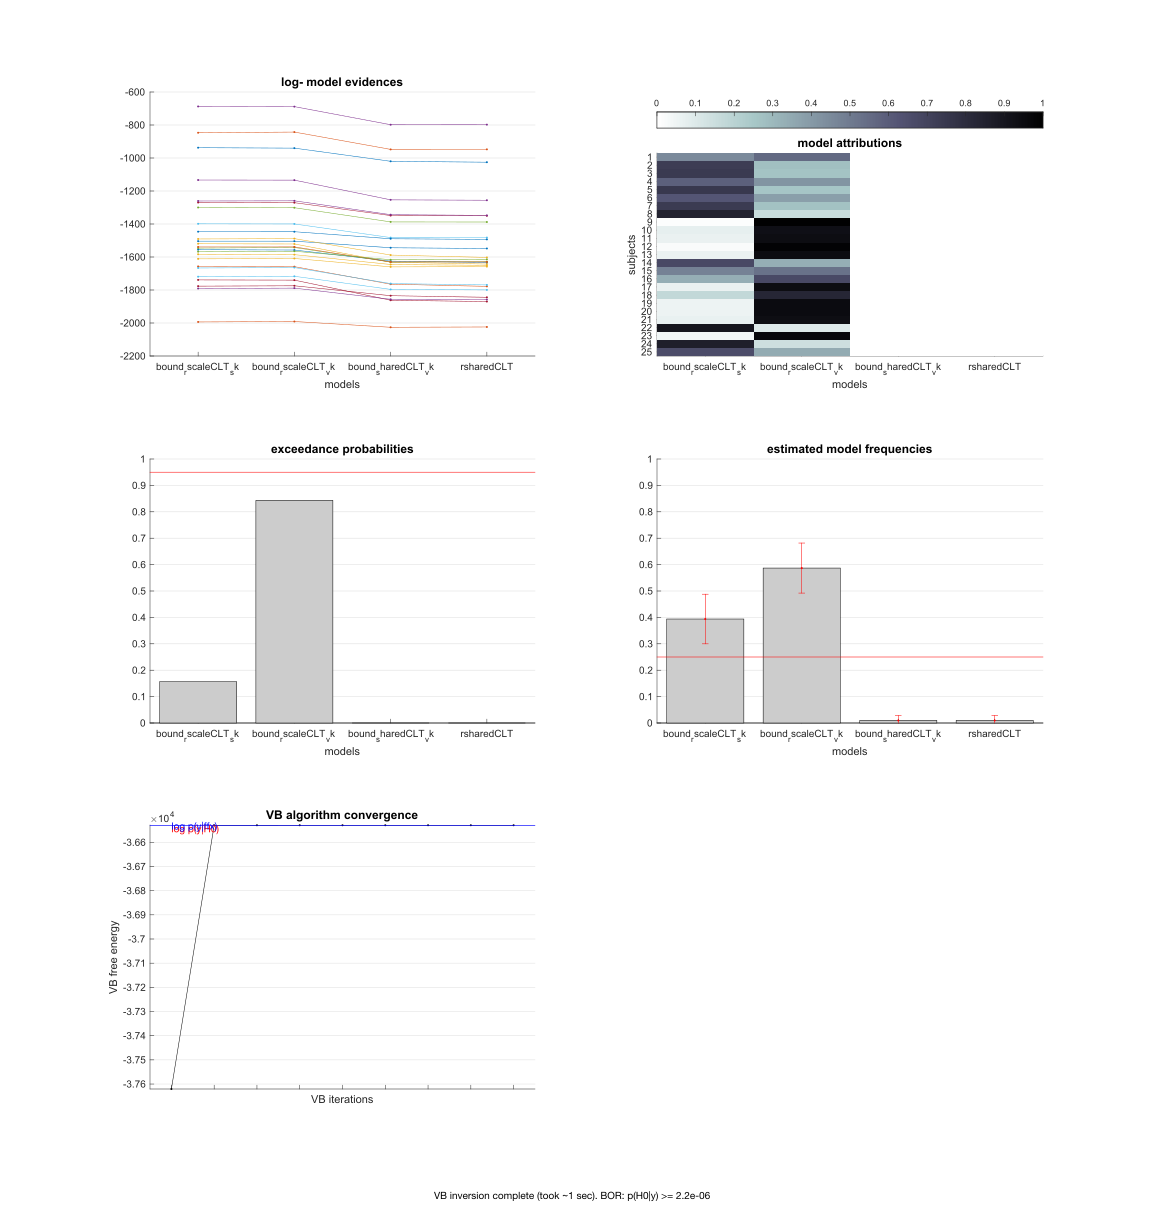

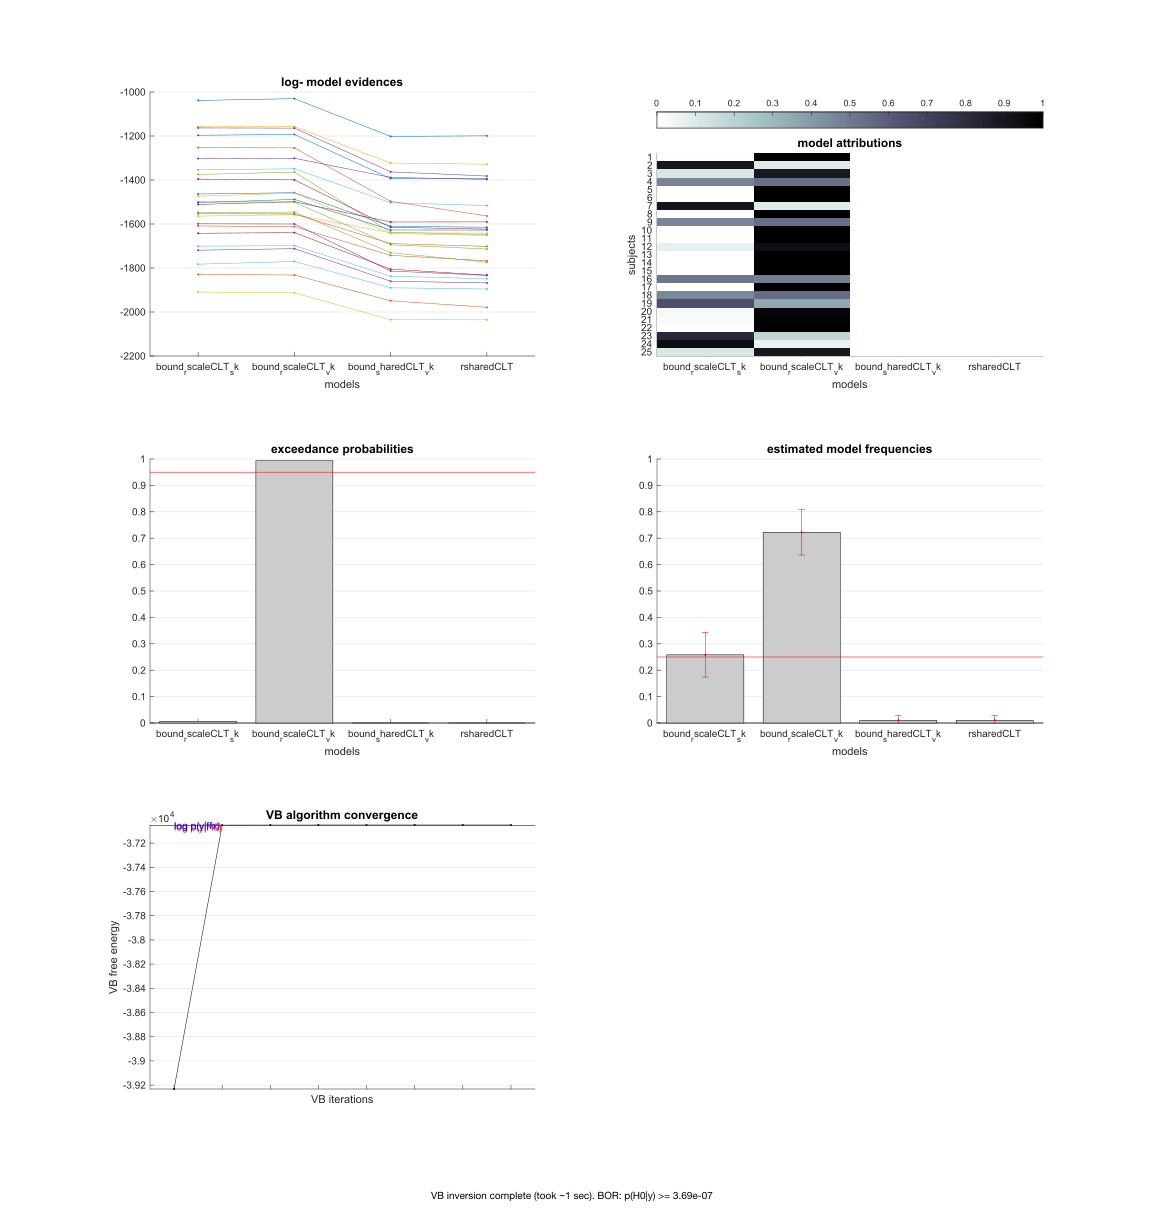

In [12]:
%what about by rho cond?
rho_conds = unique(fits_shared.rho_cond);
outT_shared_rho = [];

for r=1:length(rho_conds)
    disp(rho_conds(r))
    [~,out_rhoi] = do_BMC(fits_shared(fits_shared.rho_cond==rho_conds(r),:));
    outT_rhoi = table(out_rhoi.options.modelNames',out_rhoi.Ef,out_rhoi.ep',out_rhoi.PEP',...
        'VariableNames',{'model','EF','EP','PEP'});
    outT_rhoi.rho_cond = repmat(rho_conds(r),height(outT_rhoi),1);
    outT_shared_rho = [outT_shared_rho;outT_rhoi];
    clear outT_rhoi
end
outT_shared_rho

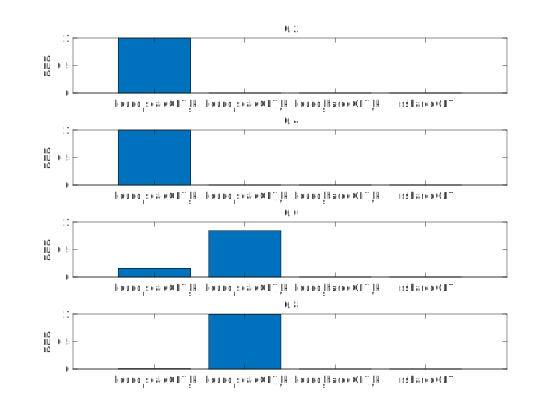

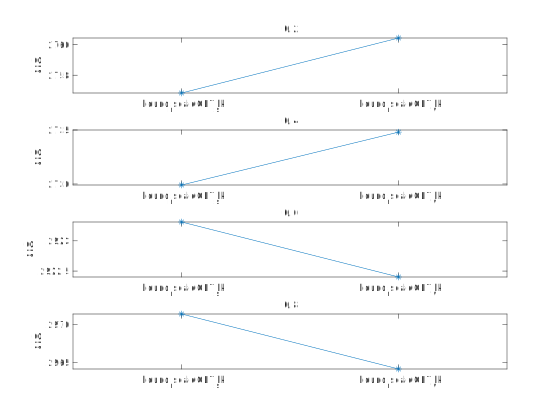

In [13]:
fits_shared_ave_rhoP = innerjoin(fits_shared_ave_rho,outT_shared_rho,'Keys',{'rho_cond','model'});
fits_shared_ave_rhoP(:,{'model','mean_aic','PEP','EF'});

figure();
for r=1:length(rho_conds)
    subplot(4,1,r)
    %disp(rho_conds(r))
    bar(categorical(fits_shared_ave_rhoP.model(fits_shared_ave_rhoP.rho_cond==rho_conds(r))),...
        fits_shared_ave_rhoP.PEP(fits_shared_ave_rhoP.rho_cond==rho_conds(r)))
    title(rho_conds(r))
    ylabel('PEP')
end

figure();
for r=1:length(rho_conds)
    subplot(4,1,r)
    %disp(rho_conds(r))
    this_ave = fits_shared_ave_rhoP(fits_shared_ave_rhoP.rho_cond==rho_conds(r) & ...
        ismember(fits_shared_ave_rhoP.model,{'bound_rscaleCLT_sk','bound_rscaleCLT_vk'}),:);
    plot(categorical(this_ave.model), ...
        this_ave.mean_aic,'-*')
    title(rho_conds(r))
    ylabel('AIC')
end

#### do model frequencies differ by rho cond? 
yes

---
Date: 28-May-2024 15:03:53
VB converged in 10 iterations (took ~2 sec).
Dimensions:
     - subjects: n=50
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000
---
Date: 28-May-2024 15:03:55
VB converged in 10 iterations (took ~2 sec).
Dimensions:
     - subjects: n=50
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

p =

   6.3847e-08


h =

  logical

   1



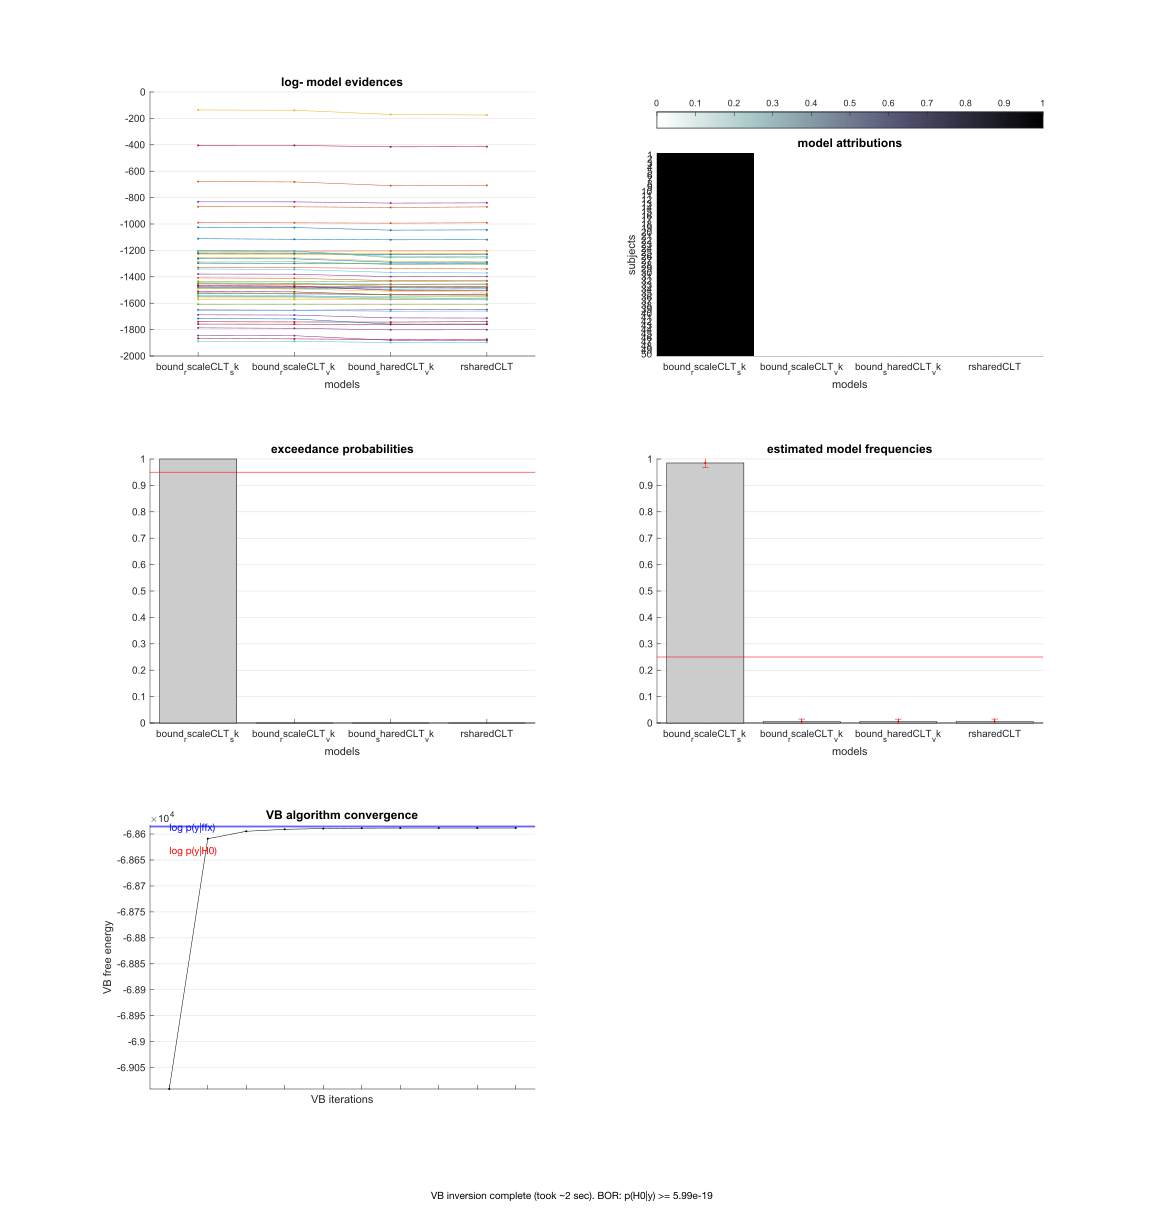

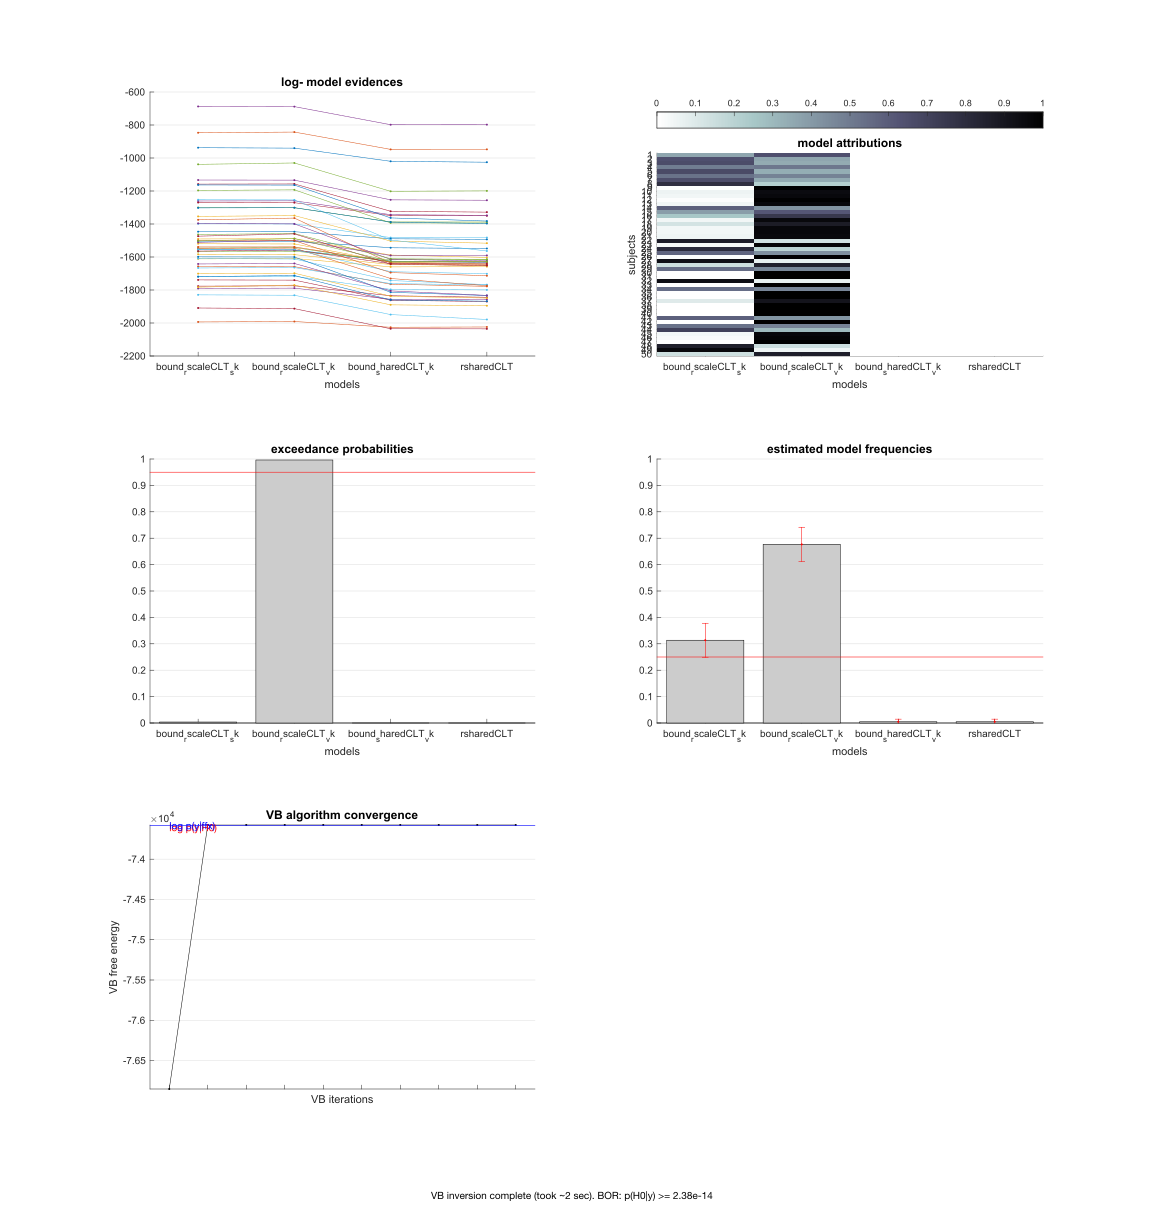

In [14]:
% Do model frequencies actually differ between low and high correlations? (Yes)
% using between-groups BMS: https://mbb-team.github.io/VBA-toolbox/wiki/BMS-for-group-studies/#between-groups-rfx-bms
% they have a function for this (VBA_groupBMC_btwGroups, but easier to do it manually to work w/ existing framework...

% run BMC separately for low (0.2,0.4) and high (0.6,0.8) correlation groups
[~,out_shared_Lrho] = do_BMC(fits_shared(fits_shared.rho_cond < 0.5,:));
[~,out_shared_Hrho] = do_BMC(fits_shared(fits_shared.rho_cond > 0.5,:));

%H~=: evidences are conditionally independent so additive
Fd = out_shared_Lrho.F(end) + out_shared_Hrho.F(end);

%if H=, then need the full pooled evidence
Fe = out_shared.F(end);

%posterior probability of equal model frequencies
p = 1/(1+exp(Fd-Fe))
h = p<.05

In [15]:
% output for graphing in python with other analyses
if false
    writetable(fits_shared_aveP,fullfile(fit_dir,sprintf('fits_shared_ave_%s.csv',date())))
    writetable(fits_shared_ave_rhoP,fullfile(fit_dir,sprintf('fits_shared_ave_rho_%s.csv',date())))
end